<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generic
import pandas as pd
import numpy as np

# Generic data sets
from sklearn.datasets import make_blobs

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

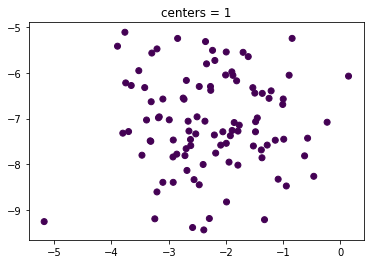

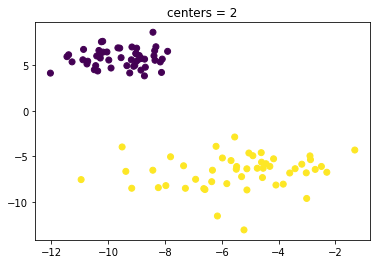

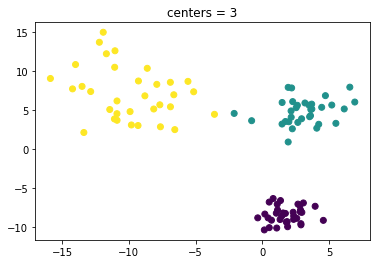

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# plot 1
X, y = make_blobs(n_features=2, centers=1,cluster_std=[1] , center_box=(10,-10))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('centers_1.png')
plt.title('centers = 1')

# plot 2    
X, y = make_blobs(n_features=2, centers=2,cluster_std=[1,2])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 2')

# plot 3
X, y = make_blobs(n_features=2, centers=3,cluster_std=[1,2,3])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 3')

plt.show()

Text(0.5, 1.0, 'centers = 3')

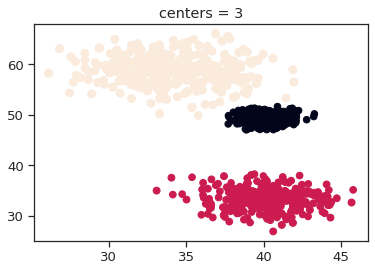

In [80]:
# create an array with 3 clusters in 3-dimensions
X , y = make_blobs(n_samples=1000 , centers=3,n_features=3 , random_state=0,cluster_std=[1,2,3] , center_box=(10,65))
plt.figure()
plt.scatter(X[:, 0], X[:, 1],X[:,2], c=y)

plt.title('centers = 3')

In [81]:
# data normilization , Scaling Transformation (standarize the data)
X = StandardScaler().fit_transform(X)

#Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0,X.shape[1])]
df = pd.DataFrame(X,columns=col_name)
df["cluster_label"] = y

df.head()



,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2


In [78]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0] , colors[1],colors[2] = ['red','green','blue']
fig = px.scatter_3d(df,x='x0',y='x1',z='x2',
                    color=df['cluster_label'].astype(str),
                    color_discrete_sequence=colors,height=500,width=1000
                    )
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
# data normilization , Scaling Transformation (standarize the data)
X = StandardScaler().fit_transform(X)

In [82]:


#Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0,X.shape[1])]
df = pd.DataFrame(X,columns=col_name)
df.head()
colors[0] , colors[1],colors[2] = ['red','green','blue']
fig = px.scatter_3d(df,x='x0',y='x1',z='x2',
                    color_discrete_sequence=colors,height=500,width=1000
                    )
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()


True

In [71]:
np.array([[1, 2], [3, 4], [5, 6]]).ndim

2

**components_** are mathematically the eigenvectors of the covariance matrix of the centered input matrix. This can be verified by using plain numpy.

#**pca.components_ ** \
is not other than the Loading Scores. With PCA with SVD (singular value decomposition), the principal components are scaled to 1. Imagine the loading scores as a recipe of a cocktail where our PC1 is made with (loading scores for PC1) 0.97 part of Gen1 and 0.242 parts of Gen2, and PC2 is made -0.242 parts of Gen1 and 0.97 of Gen2 (loading scores for PC2).

This is indeed giving us the called Singlular Vector or eigenvector for each component ( the loading scores are the coefficients of each variable for the first component versus the coefficients for the second component)

In [84]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_component = np.arange(pca.n_components_) + 1

In [85]:
np.arange(pca.n_components_)

array([0, 1, 2])

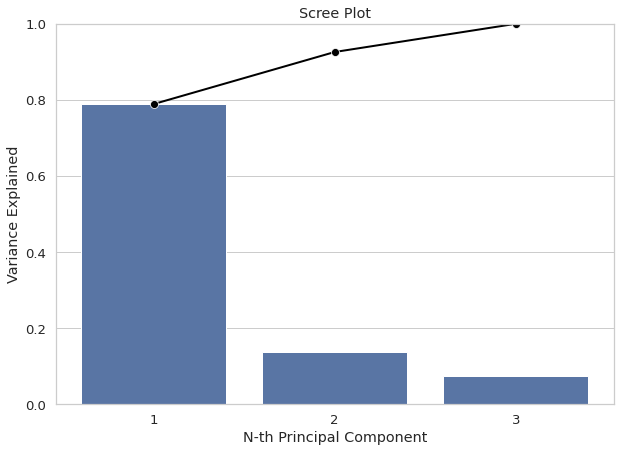

In [86]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_component, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_component-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [87]:
pca.components_

array([[-0.58133196,  0.55167281,  0.59808885],
       [-0.52991283, -0.81449076,  0.2362143 ],
       [ 0.61745085, -0.17961603,  0.765828  ]])

In [88]:
# first PCA
 pca.components_.T[:, 0]

array([-0.58133196,  0.55167281,  0.59808885])

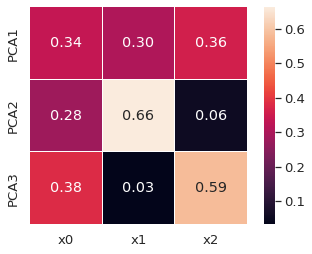

In [57]:
# Feature Weight 
# pca.components_ Principal axes in feature space, representing the directions of maximum variance in the data.
_ = sns.heatmap(pca.components_**2,
                yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                xticklabels=list(col_name),
                annot=True,
                fmt='.2f',
                square=True,
                linewidths=0.05,
                cbar_kws={"orientation":"vertical"}

                )

In [61]:
# perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)
print(pca_array)
# covert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ["PC"+str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y
df_pca.head()

[[ 1.75043499 -0.04171559]
 [ 2.25595664 -0.22613274]
 [-1.0582425   0.99859639]
 ...
 [-1.06474976 -0.85942904]
 [-1.02021039 -0.74056228]
 [-0.94737648 -1.01469647]]


,PC1,PC2,label
0,1.750435,-0.041716,2
1,2.255957,-0.226133,2
2,-1.058243,0.998596,1
3,-1.165212,-0.799110,0
4,1.478118,-0.034766,2


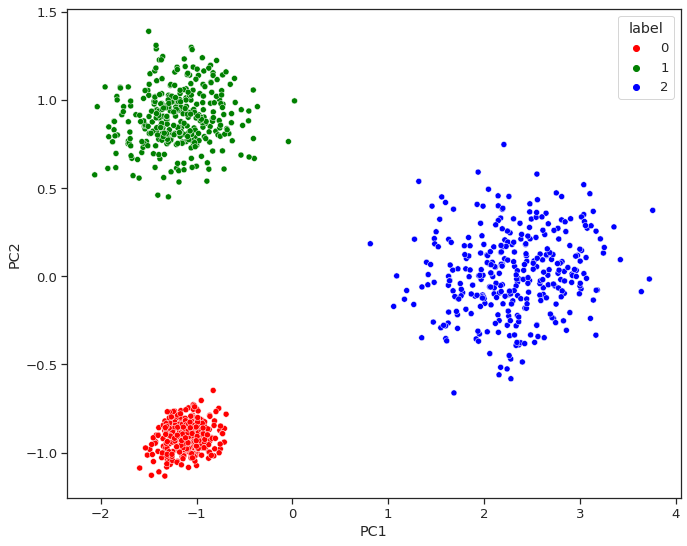

In [62]:
# Plot pc
_ = sns.set(style='ticks',font_scale=1.2)
fig , ax = plt.subplots(figsize=(11,9))
_ = sns.scatterplot(data=df_pca , x='PC1' , y = 'PC2',hue=df_pca['label'],palette=['red','green','blue'])